# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from dotenv import load_dotenv
load_dotenv() # Adding this to support my environment variables

%matplotlib inline

In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient # importing the supporting library
#Setting the news API client as the api key
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

bitcoin_news_en = newsapi.get_everything(
    q="bitcoin AND BTC",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about Facebook Libra: {bitcoin_news_en['totalResults']}")

# Show sample article
bitcoin_news_en["articles"][0]

Total articles about Facebook Libra: 1498


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Jae Thomas',
 'title': "Here's how you could win $8,000 in Bitcoin, investing classes, and more",
 'description': 'TL;DR: Enter the The Complete Bitcoin (BTC) Investment Giveaway for a chance to win over $12,000 in cryptocurrency-related prizes.\n\nThe Bitcoin Investment Giveaway includes everything you need to get started in cryptocurrency investing, plus a detailed course…',
 'url': 'https://mashable.com/shopping/feb-25-complete-bitcoin-investment-giveaway/',
 'urlToImage': 'https://mondrian.mashable.com/2021%252F02%252F25%252F29%252F527b6993551b4cdc867d406a408b92ea.8fc87.jpg%252F1200x630.jpg?signature=LuzW91oYqNerruEfoWyFEZR52oY=',
 'publishedAt': '2021-02-25T10:00:00Z',
 'content': 'TL;DR: Enter the The Complete Bitcoin (BTC) Investment Giveaway for a chance to win over $12,000 in cryptocurrency-related prizes.\r\nThe Bitcoin Investment Giveaway includes everything you need to get… [+1641 chars]'}

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news_en = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about ethereum: {ethereum_news_en['totalResults']}")

# Show sample article
ethereum_news_en["articles"][0]

Total articles about ethereum: 1912


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'NVIDIA limits RTX 3060 crypto speeds as it introduces mining cards',
 'description': "Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. The company has revealed that it's cutting the hash rate (mi…",
 'url': 'https://www.engadget.com/nvidia-limits-rtx-3060-for-crypto-mining-161657361.html',
 'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/VLoRobjl1FcFEgV_0XjzqQ--~B/aD0xMDY3O3c9MTYwMDthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2021-02/cad5ae60-7200-11eb-bbbc-25bd3507e406.cf.jpg',
 'publishedAt': '2021-02-18T16:16:57Z',
 'content': 'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-02-25,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754
1,2021-02-20,A day after the leading cryptocurrency rose mo...,0.1027,0.042,0.000,0.958
2,2021-02-19,"If it smells it's chemistry, if it crawls it's...",0.0000,0.000,0.000,1.000
3,2021-02-20,The cryptocurrency bull market has gained sign...,0.3182,0.121,0.058,0.822
4,2021-02-16,"In case you hadn't heard, Bitcoin is back in t...",0.0258,0.027,0.000,0.973


In [7]:
# Create the ethereum sentiment scores DataFrame
# Build a sentiments list for ethereum to contain the article content and columns for positive and negative sentiments.

ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
1,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789
2,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909
3,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970
4,2021-02-18,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856


In [8]:
# Describe the Bitcoin Sentiment
# Output for the bitcoin sentiment data.
bitcoin_df.describe()

,compound,positive,negative,neutral
count,92.000000,92.000000,92.000000,92.000000
mean,0.132620,0.063207,0.030163,0.906609
std,0.415710,0.078750,0.049085,0.087193
min,-0.807400,0.000000,0.000000,0.638000
25%,-0.025675,0.000000,0.000000,0.838000
50%,0.000000,0.037500,0.000000,0.925000
75%,0.485175,0.097000,0.059000,1.000000
max,0.942300,0.362000,0.186000,1.000000


In [9]:
# Describe the Ethereum Sentiment
# Output for the ethereum sentiment data.
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.229475,0.073600,0.019200,0.90720
std,0.368404,0.062776,0.043104,0.07124
min,-0.458800,0.000000,0.000000,0.75400
25%,0.000000,0.022500,0.000000,0.86175
50%,0.296000,0.068500,0.000000,0.91550
75%,0.473275,0.096500,0.000000,0.95200
max,0.831600,0.246000,0.145000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score at 0.049216.

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score at 0.877900.

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score at 0.252000. 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation

In [11]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
#N/A
lemmatizer = WordNetLemmatizer()

In [12]:
import re
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', text)
    # Remove the stop words
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [13]:
# Create a new tokens column for bitcoin

#Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
# adding the token column

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df = bitcoin_df.assign(tokens=text)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-02-25,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754,TL;DR: The Blockchain Certification Advanced T...
1,2021-02-20,A day after the leading cryptocurrency rose mo...,0.1027,0.042,0.000,0.958,TL;DR: The Blockchain Certification Advanced T...
2,2021-02-19,"If it smells it's chemistry, if it crawls it's...",0.0000,0.000,0.000,1.000,TL;DR: The Blockchain Certification Advanced T...
3,2021-02-20,The cryptocurrency bull market has gained sign...,0.3182,0.121,0.058,0.822,TL;DR: The Blockchain Certification Advanced T...
4,2021-02-16,"In case you hadn't heard, Bitcoin is back in t...",0.0258,0.027,0.000,0.973,TL;DR: The Blockchain Certification Advanced T...


In [14]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
# adding the token column

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]
ethereum_df = ethereum_df.assign(tokens=text)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818,TL;DR: The Blockchain Certification Advanced T...
1,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789,TL;DR: The Blockchain Certification Advanced T...
2,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909,TL;DR: The Blockchain Certification Advanced T...
3,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970,TL;DR: The Blockchain Certification Advanced T...
4,2021-02-18,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856,TL;DR: The Blockchain Certification Advanced T...


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
processed = tokenizer(text)
#print(processed)
# get word counts
word_counts = Counter(processed)
print(dict(word_counts))

{'tldr': 1, 'blockchain': 1, 'certification': 1, 'advanced': 1, 'training': 1, 'bundle': 1, 'sale': 1, 'feb': 1, 'saving': 1, 'list': 1, 'priceif': 1, 'youve': 1, 'taken': 1, 'note': 1, 'trend': 1, 'finance': 1, 'technology': 1, 'investi': 1, 'char': 1}


In [17]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
bigram_counts = Counter(ngrams(processed, n=2))
print(dict(bigram_counts))

{('tldr', 'blockchain'): 1, ('blockchain', 'certification'): 1, ('certification', 'advanced'): 1, ('advanced', 'training'): 1, ('training', 'bundle'): 1, ('bundle', 'sale'): 1, ('sale', 'feb'): 1, ('feb', 'saving'): 1, ('saving', 'list'): 1, ('list', 'priceif'): 1, ('priceif', 'youve'): 1, ('youve', 'taken'): 1, ('taken', 'note'): 1, ('note', 'trend'): 1, ('trend', 'finance'): 1, ('finance', 'technology'): 1, ('technology', 'investi'): 1, ('investi', 'char'): 1}


In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Get the top 10 words for Bitcoin
print(dict(word_counts.most_common(10)))

{'tldr': 1, 'blockchain': 1, 'certification': 1, 'advanced': 1, 'training': 1, 'bundle': 1, 'sale': 1, 'feb': 1, 'saving': 1, 'list': 1}


In [20]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
from nltk.corpus import stopwords, reuters
import nltk
nltk.download('reuters')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Japes\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Japes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Japes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Japes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
# Generate the Bitcoin word cloud
ids = reuters.fileids(categories='bitcoin')
corpus = [reuters.raw(i) for i in ids]

ValueError: Category bitcoin not found

In [55]:
def tokenizer(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw_words = [word.lower() for word in lem if word.lower() not in sw]
    bigrams = ngrams(sw_words, 2)
    output = ['_'.join(i) for i in bigrams]
    return ' '.join(output)


In [57]:
big_string = ' '.join(corpus)
input_words = tokenizer(big_string)

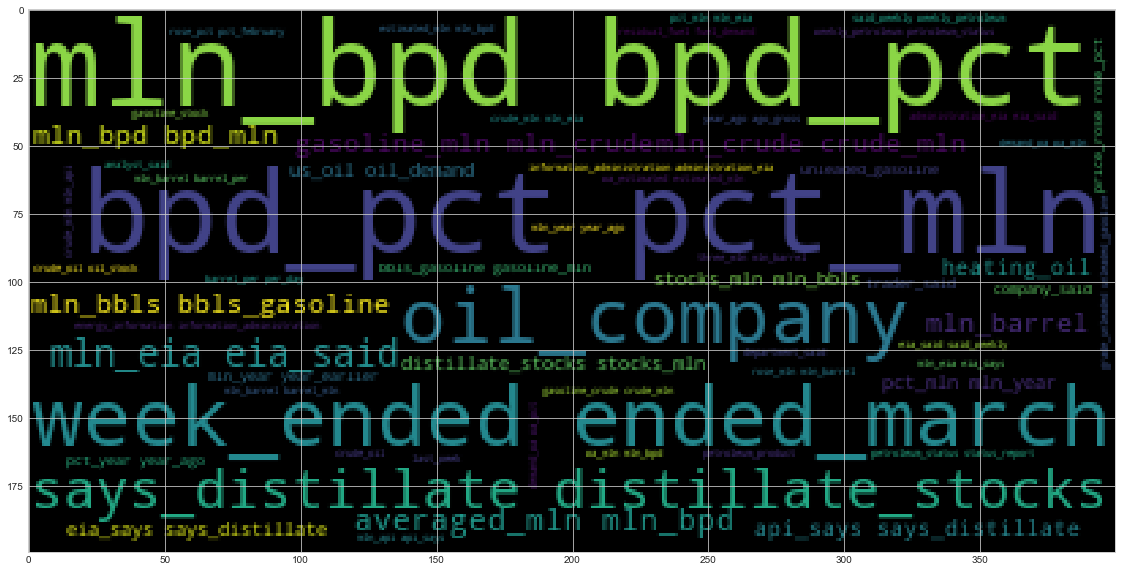

In [59]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(input_words)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [67]:
import spacy
from spacy import displacy

In [68]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [69]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [86]:
article = reuters.raw(fileids = reuters.fileids(categories='gas')[0])

doc = nlp(article)
displacy.render(doc, style='ent')

# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---

## Ethereum NER

In [ ]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!